In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
outcome_dataset = pd.read_csv('outcome-of-care-measures.csv')
hospital_dataset = pd.read_csv('hospital-data.csv')

In [3]:
outcome_Dfr = pd.DataFrame(outcome_dataset)
hospital_Dfr = pd.DataFrame(hospital_dataset)

In [4]:
outcome_Dfr = outcome_Dfr.iloc[:, [10, 16, 22, 28, 34, 40]]
outcome_Dfr.head()

,Hospital 30-Day Death (Mortality) Rates from Heart Attack,Hospital 30-Day Death (Mortality) Rates from Heart Failure,Hospital 30-Day Death (Mortality) Rates from Pneumonia,Hospital 30-Day Readmission Rates from Heart Attack,Hospital 30-Day Readmission Rates from Heart Failure,Hospital 30-Day Readmission Rates from Pneumonia
0,14.3,11.4,10.9,19.0,23.7,17.1
1,18.5,15.2,13.9,Not Available,22.5,17.6
2,18.1,11.3,13.4,17.8,19.8,16.9
3,Not Available,13.6,14.9,Not Available,27.1,19.4
4,Not Available,13.8,15.8,Not Available,24.7,18.0


In [5]:
outcome_data = pd.DataFrame()
#outcome_data['Provider.ID'] = outcome_Dfr.iloc[:, 0]
outcome_data['30-Day Death Rate Heart Attack'] = outcome_Dfr.iloc[:, 0]
outcome_data['30-Day Death Rate Heart Failure'] = outcome_Dfr.iloc[:, 1]
#outcome_data['30-Day Death Rate Pneumonia'] = outcome_Dfr.iloc[:, 0]
outcome_data['30-Day Readmission Rate Heart Attack'] = outcome_Dfr.iloc[:, 2]
outcome_data['30-Day Readmission Rate Heart Failure'] = outcome_Dfr.iloc[:, 3]
#outcome_data['30-Day Readmission Rate Pneumonia'] = outcome_Dfr.iloc[:, 1]
outcome_data['Hospital.Type'] = hospital_Dfr.iloc[:, 11]

In [6]:
outcome_data = outcome_data.replace(to_replace='Not Available', value=np.nan)
outcome_data.iloc[:, :4] = outcome_data.apply(pd.to_numeric, errors='coerce')
outcome_data = outcome_data.dropna(axis=0, how='any')
outcome_data.head()

,30-Day Death Rate Heart Attack,30-Day Death Rate Heart Failure,30-Day Readmission Rate Heart Attack,30-Day Readmission Rate Heart Failure,Hospital.Type
0,14.3,11.4,10.9,19,Government - Hospital District or Authority
2,18.1,11.3,13.4,17.8,Government - Hospital District or Authority
6,17.7,10.9,16.2,22.4,Government - Hospital District or Authority
7,18,16.6,15.8,19.8,Voluntary non-profit - Private
8,15.9,13.6,10.7,20.3,Proprietary


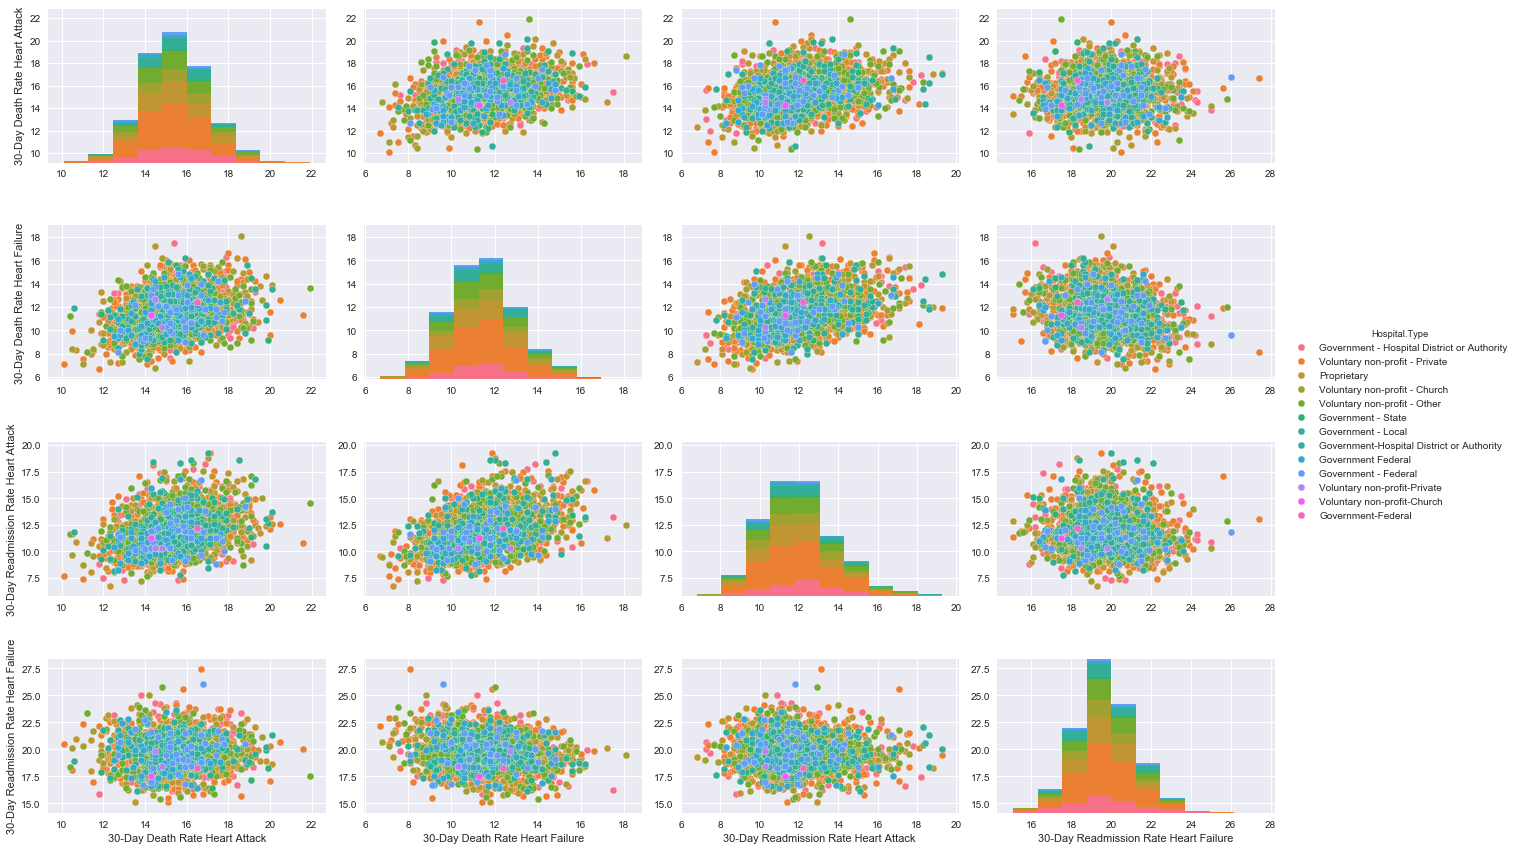

In [23]:
sns_plot = sns.pairplot(outcome_data, hue='Hospital.Type', kind = 'scatter', size=3.0, aspect=1.5)

In [24]:
sns_plot.savefig("output.png")